# 数据初步分析

## TTI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取数据
TTI_data = pd.read_csv('train_TTI.csv')
TTI_data['time'] = pd.to_datetime(TTI_data['time'])  # 转换时间格式
TTI_data['id_road'] = TTI_data['id_road'].astype('str')

In [3]:
TTI_data.head()

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00


In [4]:
print(TTI_data['time'].min(),
TTI_data['time'].max())

2019-01-01 00:00:00 2019-12-21 23:50:00


In [5]:
TTI_data.shape

(296198, 4)

给出了一年的数据，每10min一个间隔，共296198条数据

Text(0, 0.5, 'Speed')

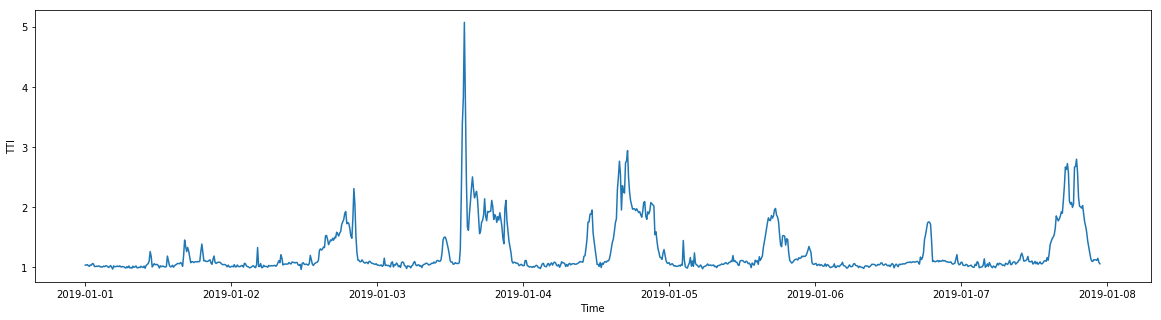

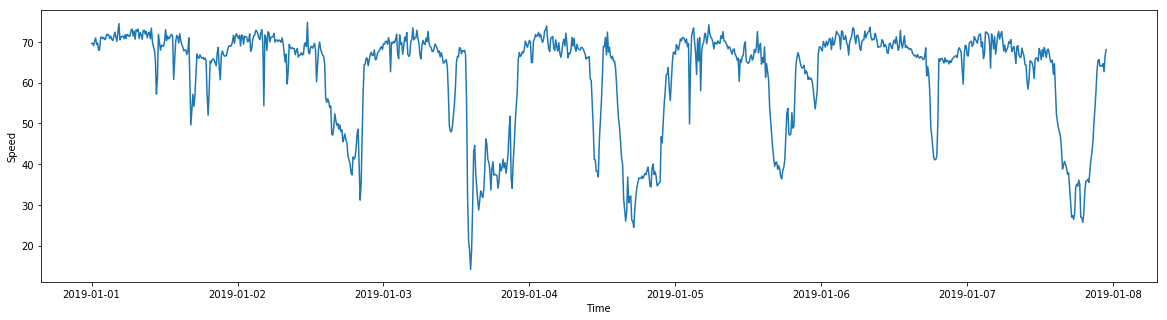

In [6]:
# 简单观察下数据
plotdata = TTI_data[TTI_data['id_road'] == '276183'].head(1000)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,5))
plt.plot(plotdata['time'],plotdata['TTI'])
plt.xlabel('Time')
plt.ylabel('TTI')
plt.figure(figsize=(20,5))
plt.plot(plotdata['time'],plotdata['speed'])
plt.xlabel('Time')
plt.ylabel('Speed')

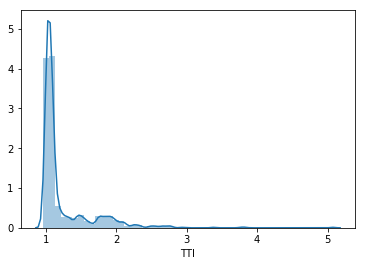

In [7]:
sns.distplot(plotdata['TTI'])

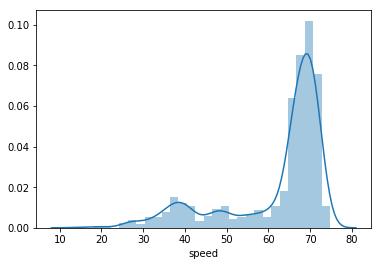

In [8]:
sns.distplot(plotdata['speed'])

##  网约车GPS

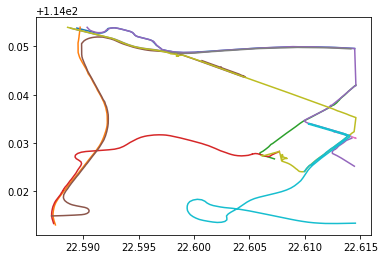

In [9]:
chunksize = 1000
gps_data = pd.read_csv('20191201_20191220.csv',chunksize = chunksize,
                       names=['id_customer','id_order','gps'])
test_data = gps_data.get_chunk(chunksize)

for i in range(10):
    gps_path = test_data['gps'][i]
    t_list = gps_path.strip('[]').replace(',','').split(' ')
    t_list = np.array([float(t) for t in t_list])
    pathdata = pd.DataFrame(t_list.reshape(-1,5),columns =['lon','lat','speed','theta','time'],)
    plt.plot(pathdata['lat'],pathdata['lon'])

In [15]:
pathdata.head()

,lon,lat,speed,theta,time
0,114.02408,22.60995,0.89,14.486000,1.576503e+09
1,114.02408,22.60995,1.34,14.486000,1.576503e+09
2,114.02416,22.60997,3.63,70.566299,1.576503e+09
3,114.02416,22.60997,3.63,70.566299,1.576503e+09
4,114.02429,22.61002,5.77,70.894096,1.576503e+09


time这一列如何理解？

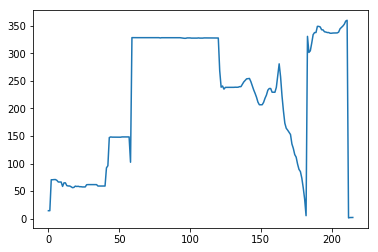

In [14]:
plt.plot(pathdata['theta'])

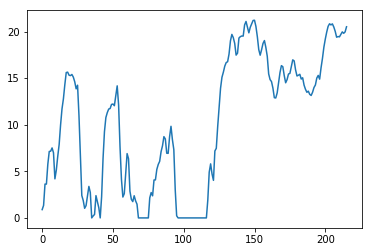

In [16]:
plt.plot(pathdata['speed'])

In [18]:
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoidG9uZ3hpbnJlbiIsImEiOiJjazZnM2phcXEwdTJ5M2pxcHQ3MDRteHNlIn0.ci2XKyZQRC_tAEcvxVIeAQ')
fig = px.scatter_mapbox(pathdata, lat="lat", lon="lon",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()


为什么数据由一些偏移？？  是否时因为这个绘图软件的原因？